In [10]:
from explainability.structured.samples.challengers.replace_challenger import ReplaceChallenger
from explainability.structured.samples.explainers.interpretml.morris_explainer import MorrisExplainer
from explainability.structured.samples.explainers.interpretml.pdp_explainer import PDPExplainer
from explainability.structured.samples.explainers.interpretml.ebm_explainer import EBMExplainer
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from interpret.glassbox import ExplainableBoostingClassifier

In [2]:
# Load adult income dataset, 100 rows
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header=None, nrows=1000)
df.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry",
    "Income"
]
df.drop([
    "fnlwgt", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race",
    "NativeCountry"
], axis=1, inplace=True)
label_column = "Income"

In [3]:
# Define our base scikit-learn model
model = DecisionTreeClassifier(max_depth=3)

# Sample Explainers

In [4]:
rc = ReplaceChallenger(model, df, label_column)
rc.generate_challenges()
rc.train_models()

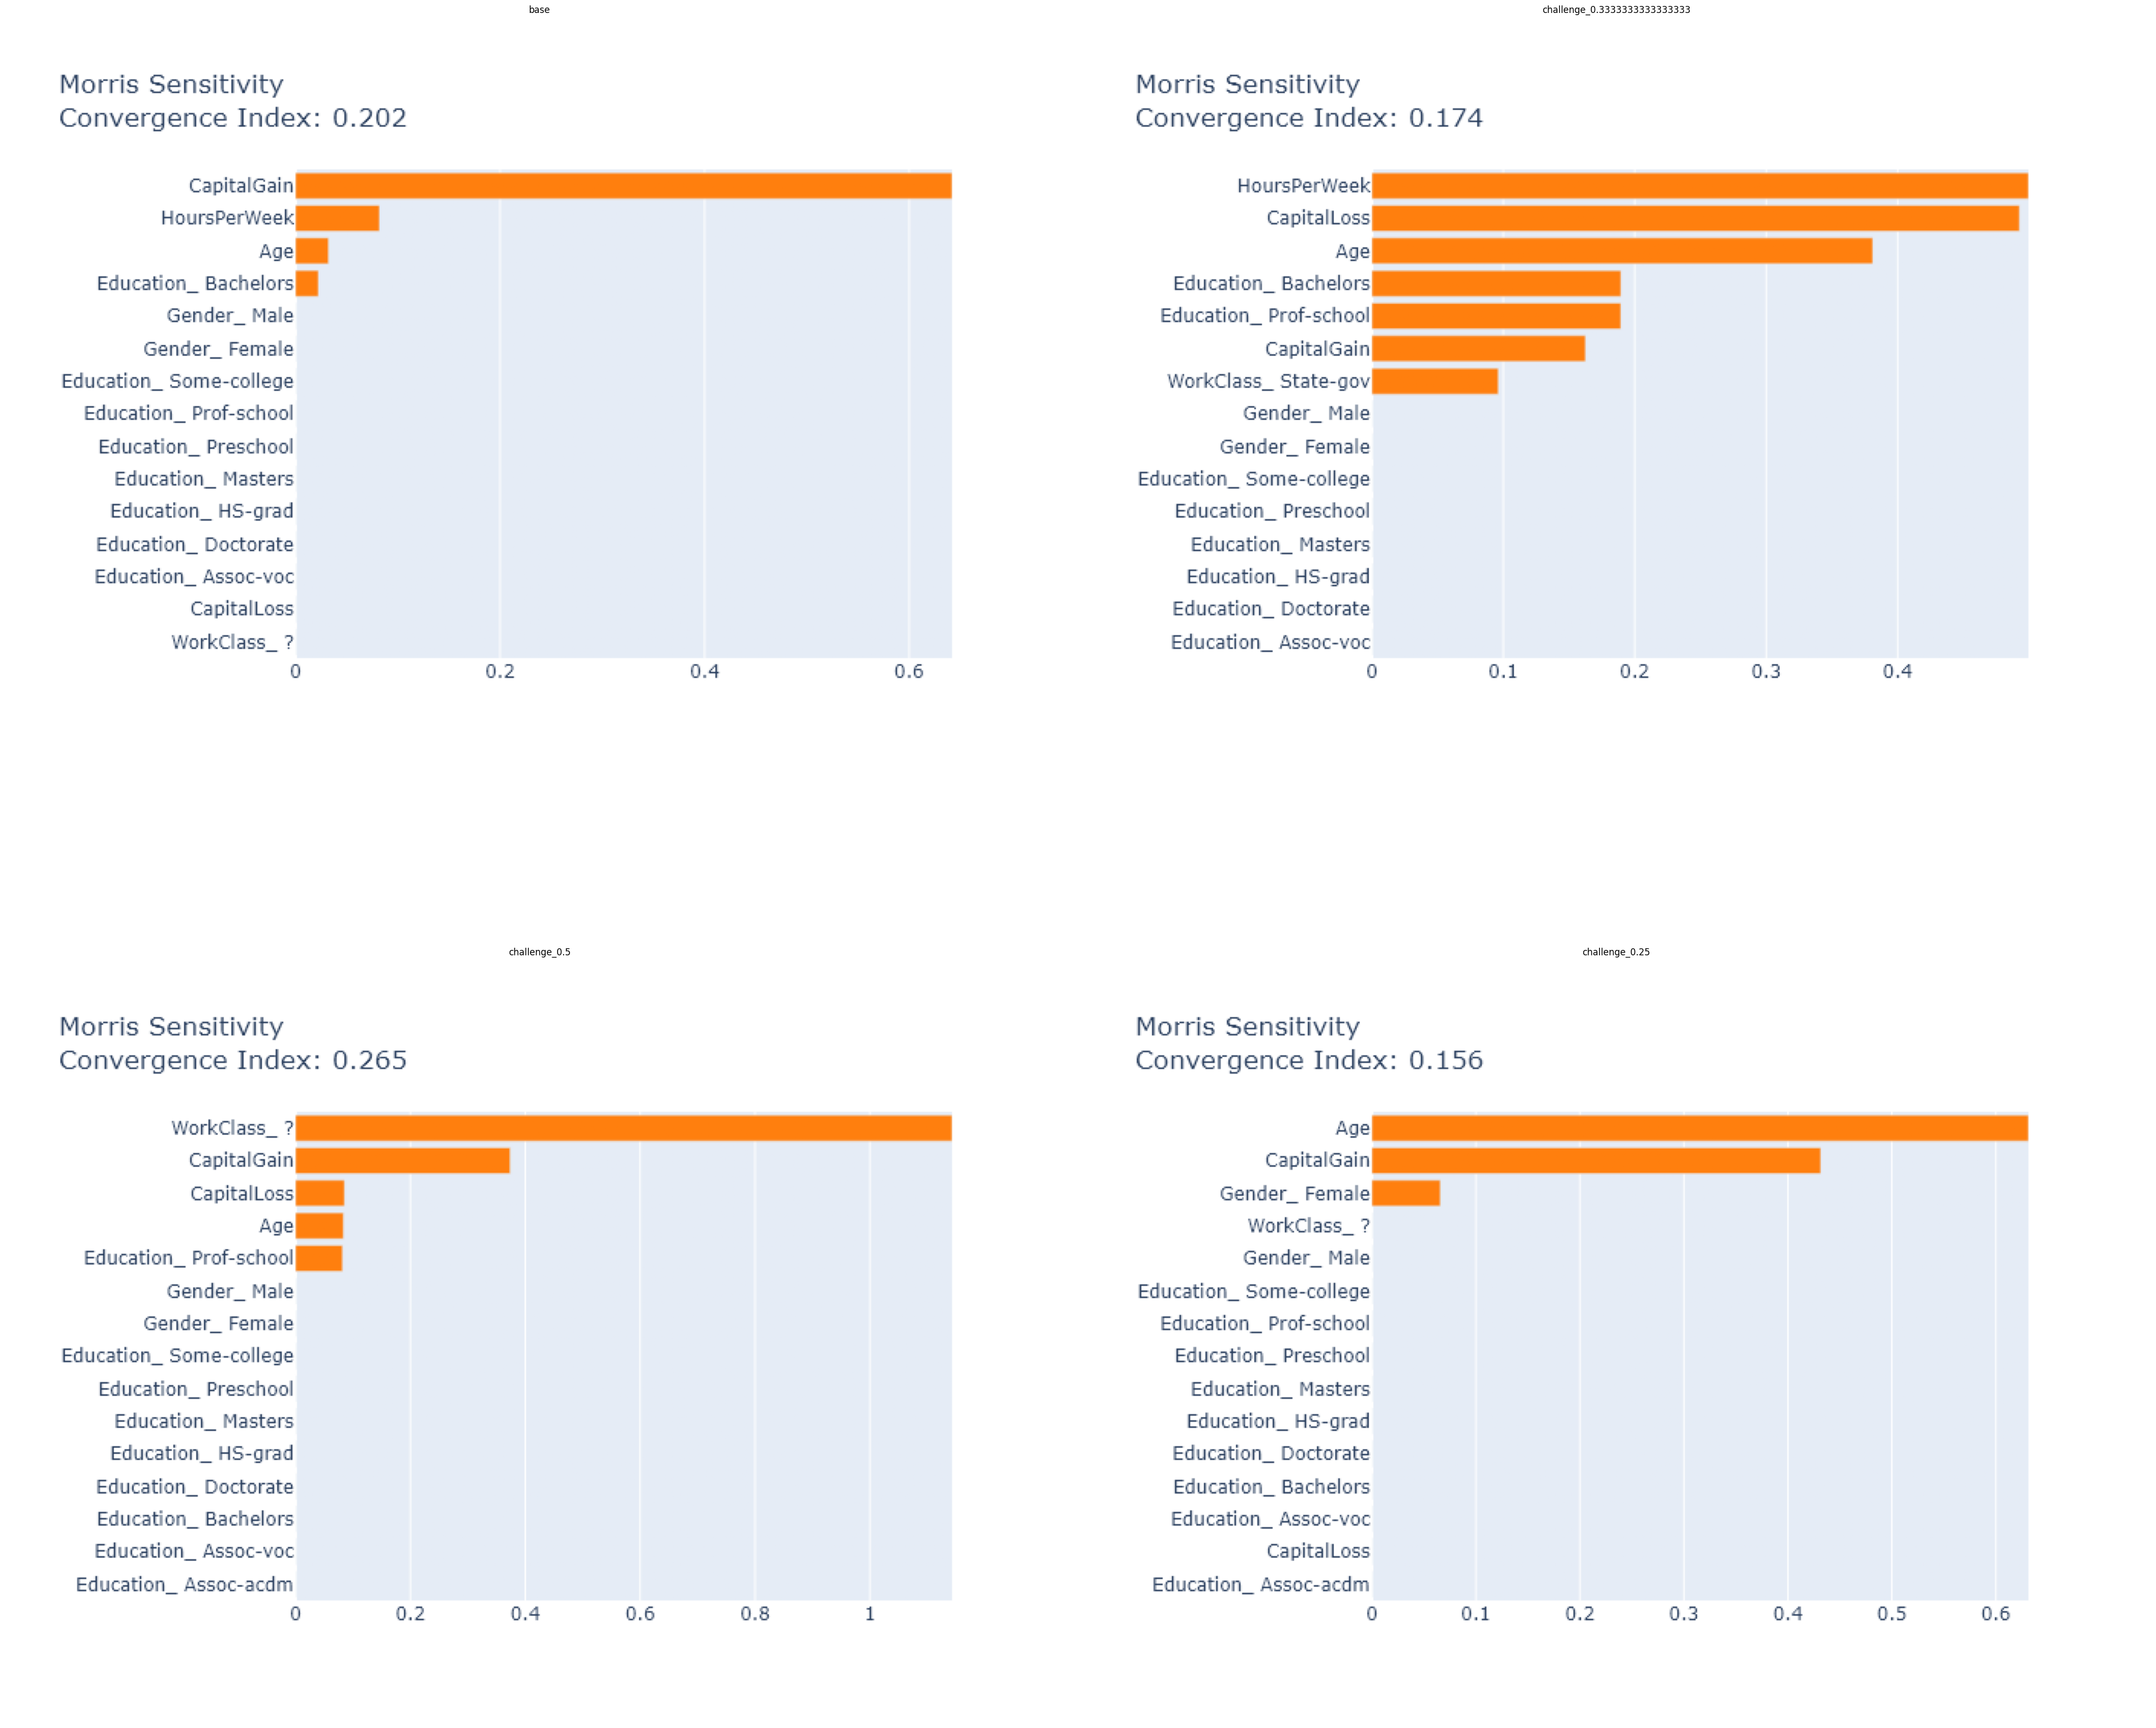

In [5]:
# explainer using Morris sensitivity from InterpretML
me = MorrisExplainer()
me.explain_challenge(rc, "morris_explainer_replace.png")

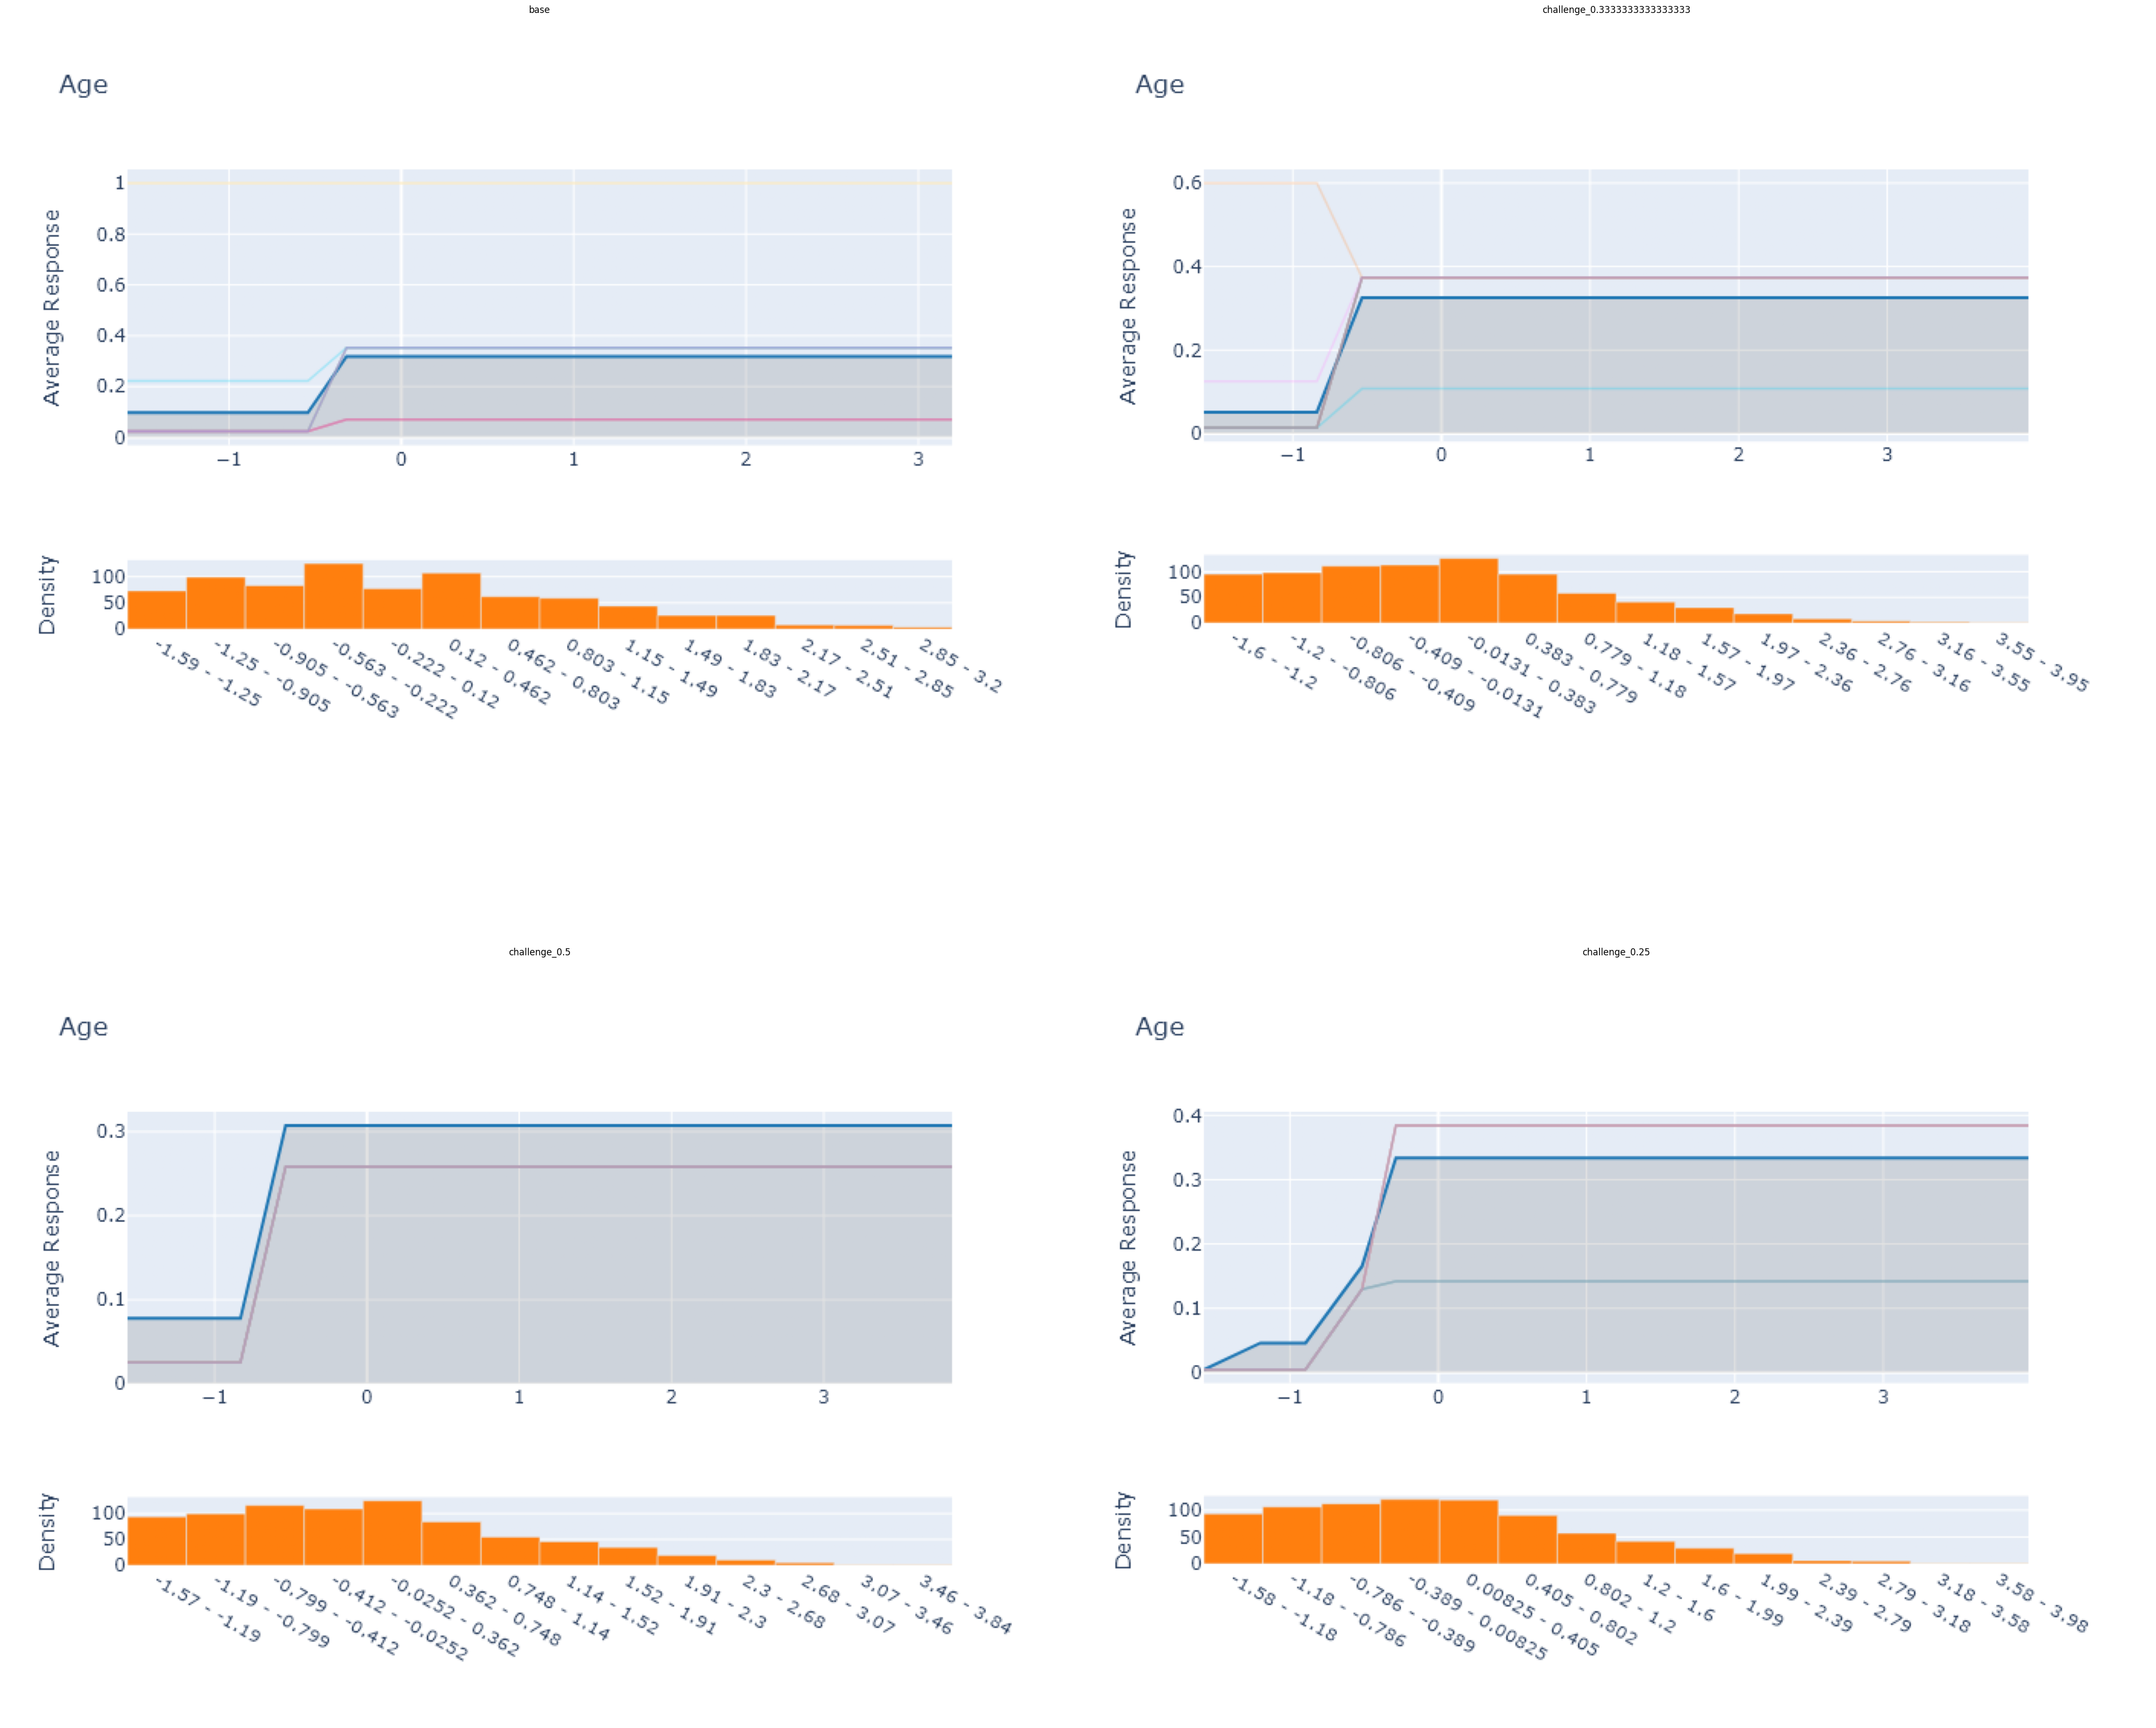

In [8]:
# feature explainer using partial dependence plot from InterpretML
pdpe = PDPExplainer()
pdpe.explain_challenge(rc, "Age", "pdp_explainer_replace.png")

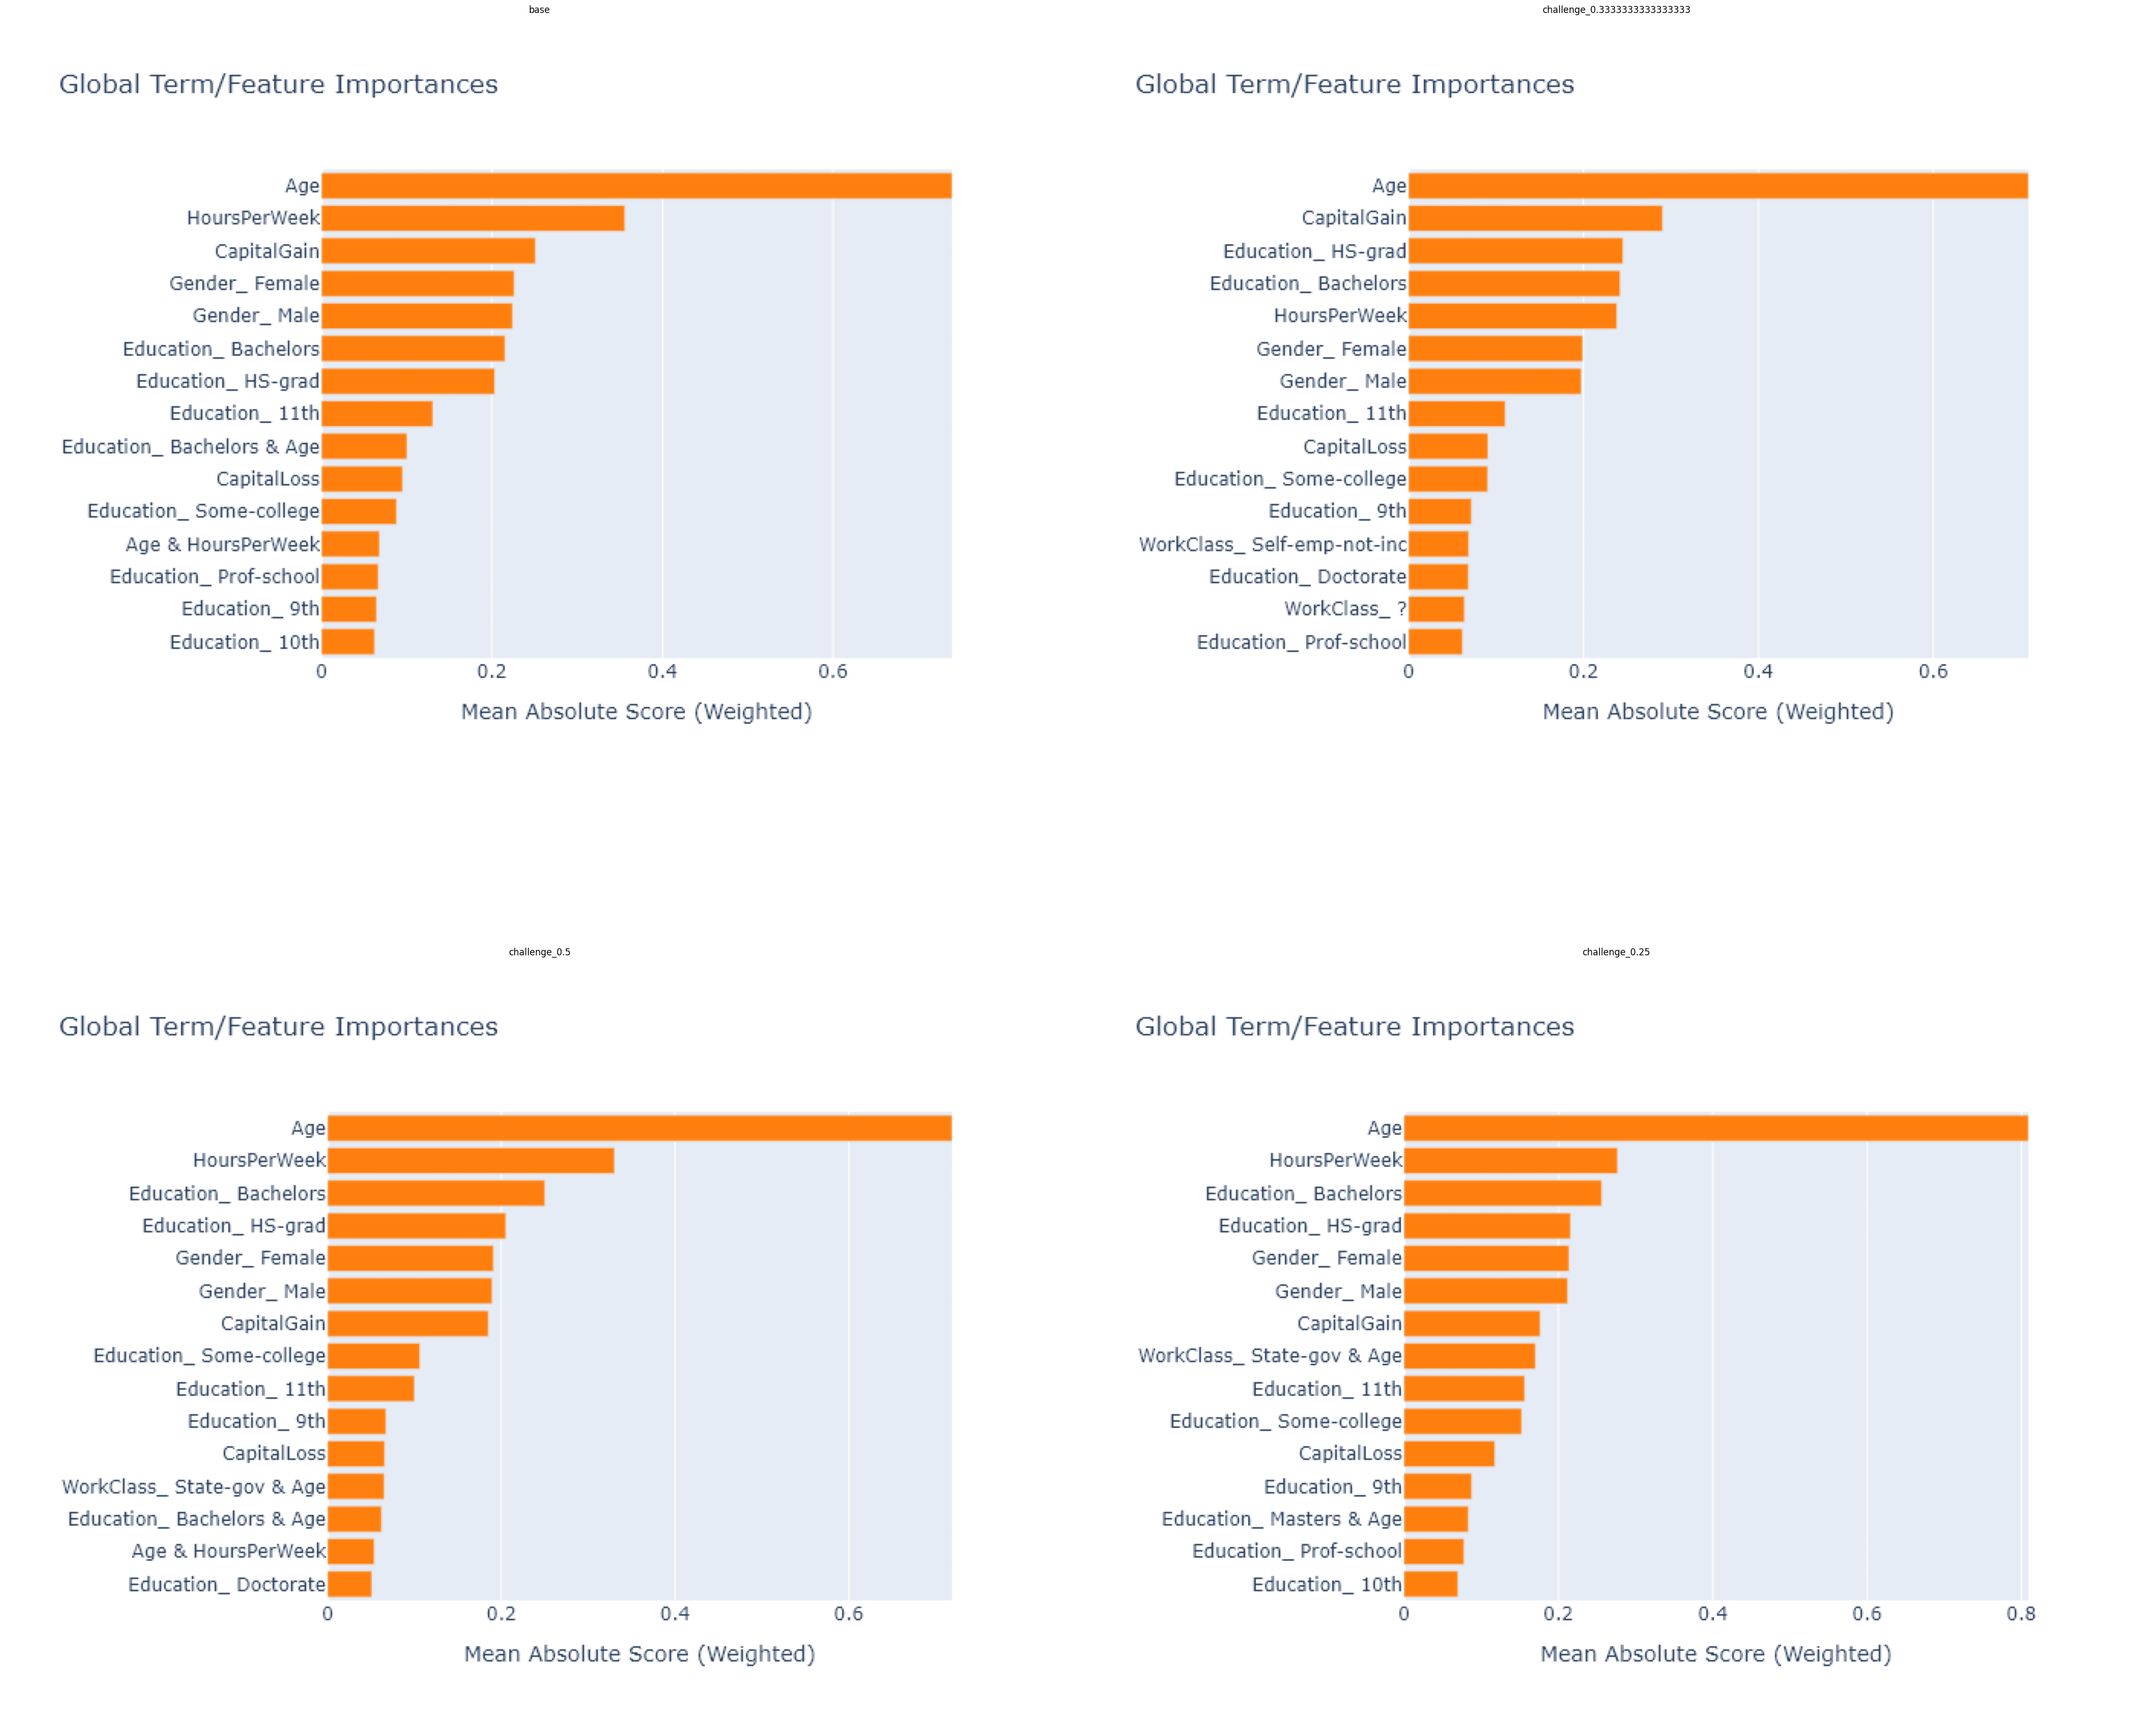

In [12]:
# explainer using explainable boosting machine from InterpretML glassbox models
model = ExplainableBoostingClassifier()
rc = ReplaceChallenger(model, df, label_column)
rc.generate_challenges()
rc.train_models(interpret=True)

ebme = EBMExplainer()
ebme.explain_challenge(rc, "ebm_explainer_replace.png")

# Custom Explainer